In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Your goal is to come up with new pandas dataframe that doesn't have the outliers present in it.
#---------------Q1------------#

In [4]:
df = pd.read_csv("Excels\\AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [7]:
min_threshold,max_threshold = df.price.quantile([0.01,0.999])
min_threshold,max_threshold

(30.0, 3000.0)

In [8]:
df2 = df[ (df.price > min_threshold) & (df.price < max_threshold) ]
df2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
df2.price.describe()

count    48183.000000
mean       148.772036
std        153.594795
min         31.000000
25%         70.000000
50%        110.000000
75%        179.000000
max       2999.000000
Name: price, dtype: float64

In [10]:
# Your goal is to come up with new pandas dataframe that doesn't have the outliers present in it.
#---------------Q2------------#

In [11]:
df = pd.read_csv("Excels\\bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [12]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [13]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [14]:
df.shape

(13200, 7)

In [15]:
min_threshold,max_threshold = df.price_per_sqft.quantile([0.001,0.999])
min_threshold,max_threshold

(1366.184, 50959.36200000098)

In [16]:
outliers = df[(df.price_per_sqft < min_threshold) | (df.price_per_sqft > max_threshold)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12355,other,4 BHK,16335.0,4.0,149.0,4,912
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
7012,other,1 BHK,650.0,1.0,500.0,1,76923
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000


In [17]:
df2 = df[(df.price_per_sqft > min_threshold) & (df.price_per_sqft < max_threshold)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [18]:
df.shape[0] - df2.shape[0] # we removed from orginal df 28 outliers

28

In [19]:
#-----------Now We Remove outliers using 4 Standrad Deviations--------#

In [20]:
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit,max_limit

(-9900.429065502549, 23227.73653589429)

In [21]:
df2[(df2.price_per_sqft < min_limit) | (df2.price_per_sqft > max_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [22]:
df3 = df2[(df2.price_per_sqft > min_limit) & (df2.price_per_sqft < max_limit)]
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [23]:
df2.shape[0]-df3.shape[0]       # here we removed 125 outliers

125

(array([  65., 1394., 2927., 2989., 1930., 1173.,  606.,  391.,  291.,
         255.,  212.,  167.,  153.,  117.,  110.,   83.,   45.,   82.,
          29.,   28.]),
 array([ 1379.  ,  2470.75,  3562.5 ,  4654.25,  5746.  ,  6837.75,
         7929.5 ,  9021.25, 10113.  , 11204.75, 12296.5 , 13388.25,
        14480.  , 15571.75, 16663.5 , 17755.25, 18847.  , 19938.75,
        21030.5 , 22122.25, 23214.  ]),
 <BarContainer object of 20 artists>)

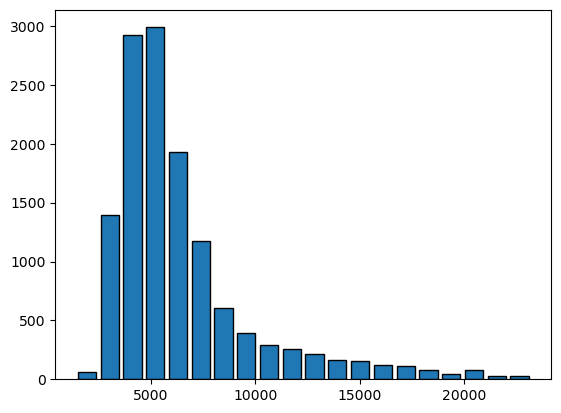

In [28]:
plt.hist(df3.price_per_sqft,bins=20,rwidth=0.8,edgecolor='black')

In [29]:
from scipy.stats import norm
import numpy as np

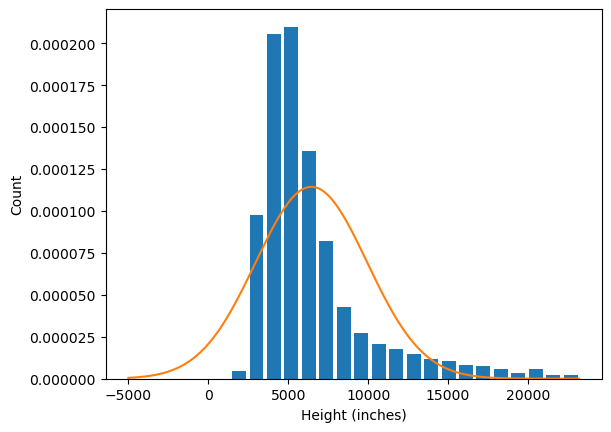

In [39]:
plt.hist(df3.price_per_sqft,bins=20,rwidth=0.8,density=True)

plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000,df3.price_per_sqft.max(),100)
plt.plot(rng,norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))
plt.show()

In [40]:
#----------Remove Outliers using Z-Score. Use Z-score of 4 as your threshold

In [42]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\musta\AppData\Local\Temp\ipykernel_11884\722868599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9401,Begur Road,2 BHK,1240.0,2.0,45.880,2,3700,-0.715682
12713,Abbigere,2 BHK,1000.0,2.0,41.000,2,4100,-0.619087
8778,other,3 BHK,1732.5,3.0,91.855,3,5301,-0.329062
548,Banashankari,3 BHK,1200.0,2.0,42.000,3,3500,-0.763979
7198,Sarjapur Road,2 BHK,1350.0,2.0,102.000,2,7555,0.215248
3570,other,3 BHK,1910.0,3.0,190.000,3,9947,0.792883
11615,Rachenahalli,3 BHK,2600.0,3.0,160.000,3,6153,-0.123316
9115,Judicial Layout,7 BHK,1200.0,7.0,199.000,7,16583,2.395387
8662,Padmanabhanagar,3 BHK,1360.0,3.0,75.000,3,5514,-0.277626
1696,Electronic City Phase II,3 BHK,1320.0,2.0,38.130,3,2888,-0.911769


In [43]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [46]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
10465,Electronic City,4 Bedroom,1800.0,3.0,700.0,4,38888,7.781740
3420,other,3 Bedroom,1350.0,3.0,380.0,3,28148,5.188176
9229,1st Phase JP Nagar,4 Bedroom,1200.0,4.0,300.0,4,25000,4.427977
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
1659,Whitefield,5 Bedroom,3250.0,5.0,900.0,5,27692,5.078059


In [48]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [49]:
df2.shape[0] - df4.shape[0]  # Here we Removed 125 Outliers too

125